In [1]:
import pdfplumber

In [2]:
pdf = pdfplumber.open("./data/studies_in_manuscript_cultures/36.pdf")

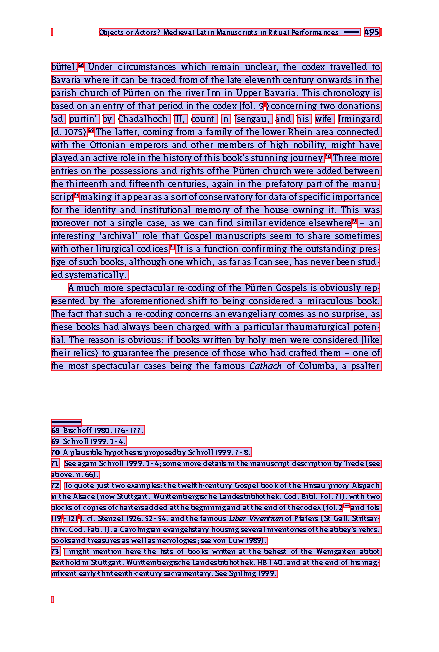

In [136]:
page = pdf.pages[500]
im = page.to_image()
lines = page.extract_words(keep_blank_chars=True, extra_attrs=("size",))
im.draw_rects(lines)

In [138]:
from collections import Counter
blocks = []
for page in pdf.pages:
    lines = page.extract_words(keep_blank_chars=True, extra_attrs=("size",))
    last_size = -1
    for line in lines:
        size = round(line["size"], 2)
        text = line["text"]
        if last_size == size:
            blocks[-1][1] = "".join([blocks[-1][1], text])    
        else:
            blocks.append([round(size), text])
        last_size = size

In [152]:
unique_sizes = sorted(set(block[0] for block in blocks), reverse=True)
for block in blocks:
    level = unique_sizes.index(block[0])
    spaces = "-"*level*2
    print(f"level{level}\t {spaces}", end="")
    print(block[1])

level8	 ----------------Manuscripts and Performances in Religions, Arts, and Sciences
level1	 --Studies in Manuscript Cultures 
level5	 ----------Edited by Imre Galambos, Konrad Hirschler, Caroline Macé, Cécile Michel, Jörg B. Quenzer and Eva Wilden
level1	 --Volume 36
level0	 Manuscripts and Performances in Religions, Arts,and Sciences
level5	 ----------Edited by Antonella Brita, Janina Karolewski, Matthieu Husson, Laure Miolo and Hanna Wimmer
level10	 --------------------The publication of this volume was funded by the Deutsche Forschungsgemeinschaft (DFG, German Research Foundation) under Germany’s Excellence Strategy – EXC 2176 ‘Understanding Written Artefacts: Material, Interaction and Transmission in Manuscript Cultures’ – project no. 390893796.ISBN 978-3-11-134347-1e-ISBN (PDF) 978-3-11-134355-6e-ISBN (EPUB) 978-3-11-134388-4ISSN 2365-9696DOI https://doi.org/10.1515/9783111343556This work is licensed under the Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 Internat